In [1]:
# WeatherPy, an analysis of cities across the globe, selected at random to determine if there is a relationship between latitude and various weather related metrics. Powered by Open Weather API.
# By Matt Taylor

In [2]:
# Importing dependencies
import json
import requests
from citipy import citipy
import random
from config import api_key
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime

In [3]:
# Create an empty list to store random cities
city_list = []

# Creating a conditional loop which will continue to generate random numbers and search for cities until a specified amount of unique cities are found
while len(city_list) < 1500:
    # Select a random latitude and longitude
    ran_lat = random.uniform(-0.9, 0.9) * 100
    ran_long = random.uniform(-1.8, 1.8) * 100

    # Using the Citipy module, find the nearest city for the given co-ordinates
    ran_city = citipy.nearest_city(ran_lat, ran_long)
    
    # If the city found is unique, add it to our list of cities
    if not ran_city.city_name in city_list:
        city_list.append(ran_city.city_name)

# Confirming the size of the list and therefore the number of unique cities found
print(f"Number of unique cities found is: {len(city_list)}")

Number of unique cities found is: 1500


In [4]:
# Load the same list of cities that the Citipy module uses, so that we can find exact co-ordinates
path = "Resources/worldcities.txt"
coordinate_df = pd.read_csv(path, sep = ",")
coordinate_df = coordinate_df[["City", "Latitude", "Longitude"]].rename(columns = {"Latitude": "Lat", "Longitude": "Lng"})

# There are some cities that have the same name in different locations, for now we will eliminate duplicates with groupby
# Later we will use the Open Weather API to check if the value is accurate
coordinate_df = coordinate_df.groupby("City").mean()

In [5]:
# Create a dataframe to store data from upcoming API calls
city_df = pd.DataFrame(city_list)
city_df.columns = ["City"]

# Perform a left merge on the new dataframe with the co-ordinate datafram
city_df = pd.merge(city_df, coordinate_df, how = "left", on = "City")

# Adding empty placeholder columns
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""

# Previewing the dataframe
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-23.366667,-149.466667,,,,,,
1,samusu,-13.966667,-171.366667,,,,,,
2,cape town,-33.925839,18.423218,,,,,,
3,xucheng,20.350001,110.128837,,,,,,
4,duz,33.466324,9.020302,,,,,,


In [6]:
# Call the Open Weather API to search each city and populate the dataframe with information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retreival")
print("-----------------------------")

for index, city in city_df.iterrows():
    
    # Take the city name from the current row, stored in the column "City" and build the endpoint URL
    city_name = city["City"]
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city_name

    # Try query the API endpoint, if the city is found, append the data we are looking for to the current row of the dataframe
    try:
        response = requests.get(query_url)
        city_data = response.json()
        
        # Check the current Lat and Lng values stored, if they differ from the API, update, otherwise leave the same
        if city_data["coord"]["lat"] != round(city_df.loc[index, "Lat"],2):
            city_df.loc[index, "Lat"] = city_data["coord"]["lat"]
        
        if city_data["coord"]["lon"] != round(city_df.loc[index, "Lng"],2):
            city_df.loc[index, "Lng"] = city_data["coord"]["lon"]        
    
        # Store the maximum temperature
        city_df.loc[index, "Max Temp"] = city_data["main"]["temp_max"]

        # Store the humidity
        city_df.loc[index, "Humidity"] = city_data["main"]["humidity"]

        # Store the cloudiness
        city_df.loc[index, "Cloudiness"] = city_data["clouds"]["all"]

        # Store the wind speed
        city_df.loc[index, "Wind Speed"] = city_data["wind"]["speed"]

        # Store the country
        city_df.loc[index, "Country"] = city_data["sys"]["country"]

        # Store the date
        city_df.loc[index, "Date"] = city_data["dt"]

        # Acknowledge that all of the records have been collected and print a confirmation
        print(f"Processing Record {index + 1} | {city_name}")
        
    except:
        # If the API endpoint cannot be found, skip that particular row/city
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retreival
-----------------------------
Processing Record 1 | mataura
City not found. Skipping...
Processing Record 3 | cape town
Processing Record 4 | xucheng
City not found. Skipping...
Processing Record 6 | inhambane
Processing Record 7 | lata
Processing Record 8 | port alfred
Processing Record 9 | ancud
Processing Record 10 | kavieng
Processing Record 11 | norman wells
Processing Record 12 | katsuura
Processing Record 13 | nome
Processing Record 14 | caravelas
City not found. Skipping...
Processing Record 16 | mayo
Processing Record 17 | taltal
Processing Record 18 | albany
Processing Record 19 | victoria
Processing Record 20 | ejido
Processing Record 21 | tilichiki
Processing Record 22 | new norfolk
Processing Record 23 | bellavista
Processing Record 24 | kruisfontein
Processing Record 25 | broken hill
Processing Record 26 | bahia blanca
Processing Record 27 | vaini
Processing Record 28 | yellowknife
City not found. Skipping...
Processing Record 30 | bluff
Processin

Processing Record 250 | magadan
Processing Record 251 | cagliliog
Processing Record 252 | ilinskiy
Processing Record 253 | pacific grove
Processing Record 254 | waw
Processing Record 255 | pochutla
Processing Record 256 | dongying
Processing Record 257 | cherskiy
Processing Record 258 | zhuhai
Processing Record 259 | pangnirtung
Processing Record 260 | yaring
Processing Record 261 | tuatapere
Processing Record 262 | faanui
Processing Record 263 | morelia
Processing Record 264 | iskateley
Processing Record 265 | beyneu
Processing Record 266 | bougouni
Processing Record 267 | tiznit
Processing Record 268 | faya
Processing Record 269 | san patricio
City not found. Skipping...
Processing Record 271 | plettenberg bay
Processing Record 272 | isiro
Processing Record 273 | constitucion
Processing Record 274 | sao jose da coroa grande
Processing Record 275 | celestun
Processing Record 276 | qostanay
Processing Record 277 | straza
Processing Record 278 | guerrero negro
Processing Record 279 | to

Processing Record 501 | mayya
Processing Record 502 | eagle pass
Processing Record 503 | bilma
Processing Record 504 | hluti
Processing Record 505 | banda aceh
Processing Record 506 | luba
Processing Record 507 | luena
Processing Record 508 | akureyri
Processing Record 509 | hami
Processing Record 510 | qingdao
Processing Record 511 | chernyshevskiy
City not found. Skipping...
Processing Record 513 | aguie
Processing Record 514 | aksu
Processing Record 515 | upington
Processing Record 516 | pedernales
Processing Record 517 | kenitra
Processing Record 518 | samarai
Processing Record 519 | baripada
Processing Record 520 | duiwelskloof
Processing Record 521 | vardo
Processing Record 522 | ballina
Processing Record 523 | toamasina
Processing Record 524 | zabid
Processing Record 525 | wanaka
Processing Record 526 | nouadhibou
Processing Record 527 | nusaybin
Processing Record 528 | palmer
Processing Record 529 | ruyigi
Processing Record 530 | promyshlennyy
Processing Record 531 | humaita
Ci

Processing Record 753 | gorele
Processing Record 754 | lake havasu city
Processing Record 755 | port-gentil
City not found. Skipping...
Processing Record 757 | erzin
Processing Record 758 | two rivers
City not found. Skipping...
Processing Record 760 | fairmont
Processing Record 761 | alyangula
Processing Record 762 | cartagena del chaira
Processing Record 763 | richards bay
Processing Record 764 | tommot
Processing Record 765 | singapore
Processing Record 766 | chute-aux-outardes
Processing Record 767 | serchhip
Processing Record 768 | beringovskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 771 | billings
Processing Record 772 | hohhot
Processing Record 773 | port lincoln
Processing Record 774 | kamenka
Processing Record 775 | ituiutaba
Processing Record 776 | dayong
Processing Record 777 | nsanje
Processing Record 778 | samfya
City not found. Skipping...
City not found. Skipping...
Processing Record 781 | luanda
Processing Record 782 | te karaka
Process

Processing Record 1003 | senanga
Processing Record 1004 | maramba
Processing Record 1005 | ilo
Processing Record 1006 | shimanovsk
Processing Record 1007 | eyl
Processing Record 1008 | vostok
City not found. Skipping...
City not found. Skipping...
Processing Record 1011 | nizhnyaya omka
Processing Record 1012 | yeppoon
Processing Record 1013 | la primavera
Processing Record 1014 | fayaoue
Processing Record 1015 | changji
Processing Record 1016 | san matias
Processing Record 1017 | yekaterinovka
City not found. Skipping...
Processing Record 1019 | durban
City not found. Skipping...
Processing Record 1021 | mbandaka
Processing Record 1022 | san andres
Processing Record 1023 | idaho falls
City not found. Skipping...
Processing Record 1025 | semey
Processing Record 1026 | penzance
Processing Record 1027 | santa fe
Processing Record 1028 | gemena
Processing Record 1029 | carlos antonio lopez
Processing Record 1030 | arzgir
Processing Record 1031 | vukovar
Processing Record 1032 | yanam
Proc

Processing Record 1247 | yorosso
Processing Record 1248 | tiarei
Processing Record 1249 | nantucket
Processing Record 1250 | valdivia
Processing Record 1251 | gorom-gorom
Processing Record 1252 | yagodnoye
City not found. Skipping...
Processing Record 1254 | porangatu
Processing Record 1255 | sangueya
Processing Record 1256 | itirapina
Processing Record 1257 | smidovich
Processing Record 1258 | goure
City not found. Skipping...
Processing Record 1260 | novobirilyussy
City not found. Skipping...
Processing Record 1262 | owando
Processing Record 1263 | beidao
Processing Record 1264 | matamoros
Processing Record 1265 | murshidabad
Processing Record 1266 | natal
Processing Record 1267 | antofagasta
Processing Record 1268 | karlstad
Processing Record 1269 | estevan
Processing Record 1270 | cabinda
Processing Record 1271 | kabompo
Processing Record 1272 | rockport
Processing Record 1273 | shelby
Processing Record 1274 | karwar
Processing Record 1275 | muncar
Processing Record 1276 | soke
Pro

Processing Record 1490 | sandakan
Processing Record 1491 | poya
Processing Record 1492 | virginia beach
Processing Record 1493 | surt
Processing Record 1494 | iaciara
Processing Record 1495 | mikhaylovka
Processing Record 1496 | hare bay
Processing Record 1497 | baghdad
City not found. Skipping...
Processing Record 1499 | limay
Processing Record 1500 | duluth
-----------------------------
Data Retrieval Complete
-----------------------------


In [7]:
# For the rows where the city data was not found, drop those rows from the dataframe
NaN = float("NaN")
city_df.replace("", NaN, inplace=True)
city_df.dropna(subset = ["Max Temp"], inplace=True)

# Export dataframe to a CSV
path = "output/city_data.csv"
city_df.to_csv(path, index=False)

# Preview the dataframe created for our analysis
print(len(city_df))
city_df.head()

1374


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.190000,168.860000,35.01,91.0,96.0,10.00,NZ,1.601212e+09
2,cape town,-33.925839,18.423218,60.80,44.0,40.0,5.82,ZA,1.601212e+09
3,xucheng,20.350001,110.128837,80.60,100.0,100.0,2.24,CN,1.601212e+09
5,inhambane,-23.865000,35.383333,84.20,66.0,40.0,6.93,MZ,1.601212e+09
6,lata,40.160000,-8.330000,77.00,52.0,0.0,7.23,PT,1.601212e+09


In [8]:
# Using describe to quickly look at the summary statistics, we can determine there are no cities with >100% humidity by the max value in the humidity column
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03
mean,20.670667,21.369556,68.112809,67.414119,48.237991,7.985932,1.601212e+09
std,31.311234,85.081377,17.404343,23.665848,39.893259,5.178925,1.332398e+02
min,-54.800000,-179.166667,12.040000,6.000000,0.000000,0.220000,1.601212e+09
25%,-5.172500,-53.737500,54.562500,54.250000,1.250000,4.000000,1.601212e+09
50%,22.956667,24.663333,69.800000,74.000000,40.000000,6.930000,1.601212e+09
75%,47.512083,95.210833,80.860000,86.000000,90.000000,10.975000,1.601212e+09
max,78.216667,179.316667,111.200000,100.000000,100.000000,34.450000,1.601212e+09


In [9]:
# Finding the timestamp from the date column (all values in the column are the same)
timestamp = datetime.datetime.fromtimestamp(city_df["Date"][0]).strftime('%d-%m-%Y')
print(timestamp)

27-09-2020


## Plotting the data

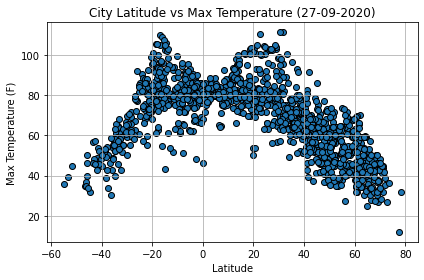

In [10]:
# Plotting the data of latitude vs max temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title(f"City Latitude vs Max Temperature ({timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig1.png")
plt.show()

### Latitude vs Max Temperature
* By simply looking at the plot generated, it appears that there is a correlation between latitude and max temperature
* The max temperature tends to reach it's maximum as latitude approaches 0 (the equator) which we would expect

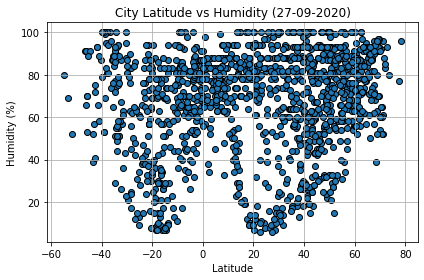

In [11]:
# Plotting the data of latitude vs humidity
y_values = city_df["Humidity"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title(f"City Latitude vs Humidity ({timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig2.png")
plt.show()

### Latitude vs Humidity
* There does not appear to be a relationship between latitude and humidity
* We are plotting relative humidity, which normalises the effect temperature has on absolute humidity, therefore it makes sense to see no relationship in the plot

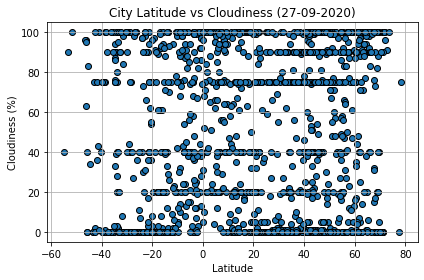

In [12]:
# Plotting the data of latitude vs cloudiness
y_values = city_df["Cloudiness"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title(f"City Latitude vs Cloudiness ({timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig3.png")
plt.show()

### Latitude vs Cloudiness
* There does not appear to be a relationship between latitude and cloudiness in this dataset
* According to the Wikipedia page for cloud cover (cloudiness), there shoud be a weak relationship showing that cloudiness is lower around the equator
* However, it is also true that cloudiness is highly variable, it could be true that there was no observable relationship at the timepoint selected
* https://en.wikipedia.org/wiki/Cloud_cover

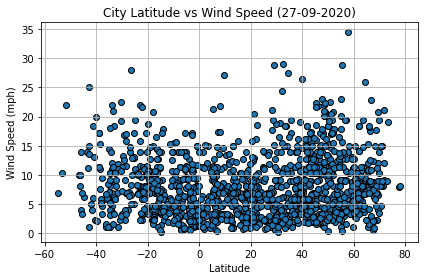

In [13]:
# Plotting the data of latitude vs wind speed
y_values = city_df["Wind Speed"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title(f"City Latitude vs Wind Speed ({timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig4.png")
plt.show()

### Latitude vs Wind Speed
* There does not appear to be a relationship between latitude and wind speed
* According to the Wikipedia page for wind speed, there are significantly more factors than simply latitude (or temperature) in determining wind speed, therefore it makes sense that we see little to no relationship
* https://en.wikipedia.org/wiki/Wind_speed

## Linear Regression

In [14]:
# Seperating the dataframe into Northern and Southern hemisphere
north_hem_df = city_df.loc[city_df["Lat"] >= 0, :]
south_hem_df = city_df.loc[city_df["Lat"] < 0, :]

In [15]:
# Defining a function to gather the outputs of the linear regression to be re-used for the upcoming analysis
def lin_regress(x, y):
    (slope, intercept, r, p, stderr) = st.linregress(x, y)
    line_eq = slope * x + intercept
    line_str = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return [r, line_eq, line_str]


The r-squared value is: 0.6364232027387943



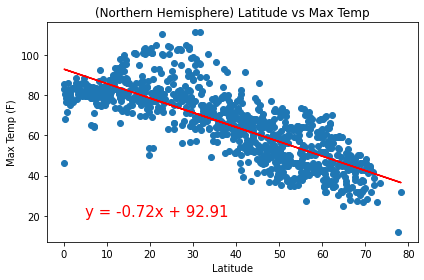

In [16]:
# Plotting the data of latitude vs max temperature for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(5, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.45754478976766433



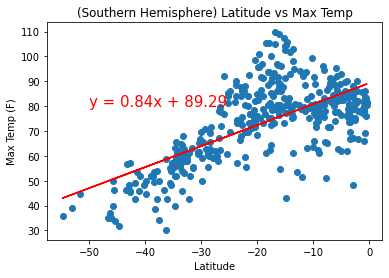

In [17]:
# Plotting the data of latitude vs max temperature for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50, 80),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Displaying the results
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Max Temp (Northern vs Southern Hemisphere)
* When splitting the latitude data by hemisphere, we can see the two linear relationships which contribute to the overall parabolic relationship observed previously in this analysis
* The Northern hemisphere data shows a strong negative correlation, while the Southern hemisphere data shows a strong positive correlation as the cities move further away from the equator in either direction


The r-squared value is: 0.009216487939422355



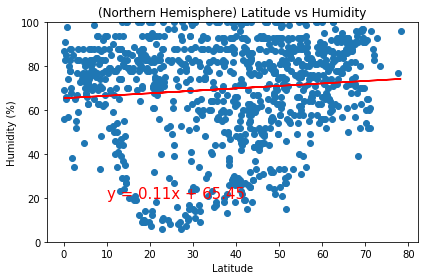

In [18]:
# Plotting the data of latitude vs humidity for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(10, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.0034662545350682156



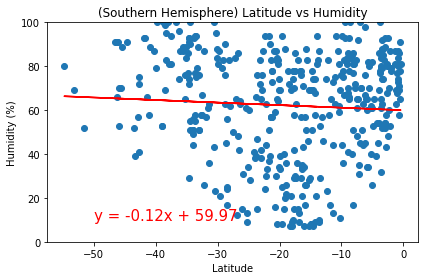

In [19]:
# Plotting the data of latitude vs humidity for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50 ,10),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Humidity (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between the variables latitude and humidity
* This is mainly because the measure of humidity used is relative humidity, rather than absolute humidity
* Splitting the data into the Northern and Southern hemispheres does not show any further relationships and suggests that latitude has no bearing on relative humidity


The r-squared value is: 0.00038101195088698574



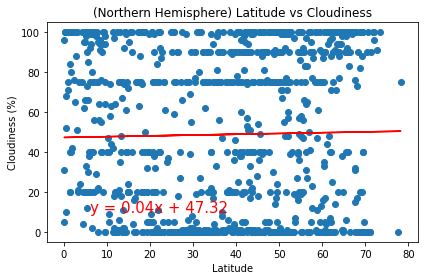

In [20]:
# Plotting the data of latitude vs cloudiness for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(6,10),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.005133919799658938



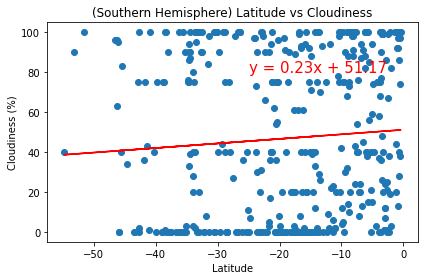

In [21]:
# Plotting the data of latitude vs cloudiness for only the Northern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-25, 80),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Cloudiness (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between latitude and cloudiness
* Even after splitting the data into Northern and Southern, we still cannot observe a decrease in cloudiness around the equator


The r-squared value is: 0.03166133394286057



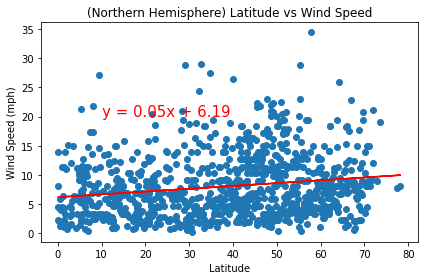

In [22]:
# Plotting the data of latitude vs wind speed for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(10, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.05109882778149736



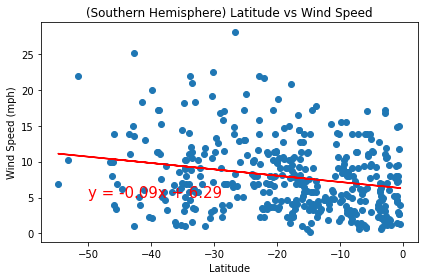

In [23]:
# Plotting the data of latitude vs wind speed for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50, 5),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Wind Speed (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between latitude and wind speed
* Splitting the data into the Northern and Southern hemispheres does not show any further relationships and suggests that latitude has little to no bearing on wind speed